In [166]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [167]:
# Loading Dataset
df = pd.read_csv("train.csv")

# Some basic stats on the target variable
print('# startup failed = {}'.format(len(df[df['failure'] == 1])))
print('# startup succeed = {}'.format(len(df[df['failure'] == 0])))
print('% startup failed = {}%'.format(round(float(len(df[df['failure'] == 1])) / len(df) * 100), 3))

df.apply(lambda x: sum(x.isnull()), axis=0)

# startup failed = 1309
# startup succeed = 4935
% startup failed = 21%


index      0
attr1      0
attr2      0
attr3      0
attr4      0
attr5      0
attr6      0
attr7      0
attr8      0
attr9      0
attr10     0
attr11     0
attr12     0
attr13     0
attr14     0
attr15     0
attr16     0
attr17     0
attr18     0
attr19     0
attr20     0
failure    0
dtype: int64

/var/folders/rv/rg6w6czd6pj29wwg1_jsbhxc0000gn/T/ipykernel_19251/3091480275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

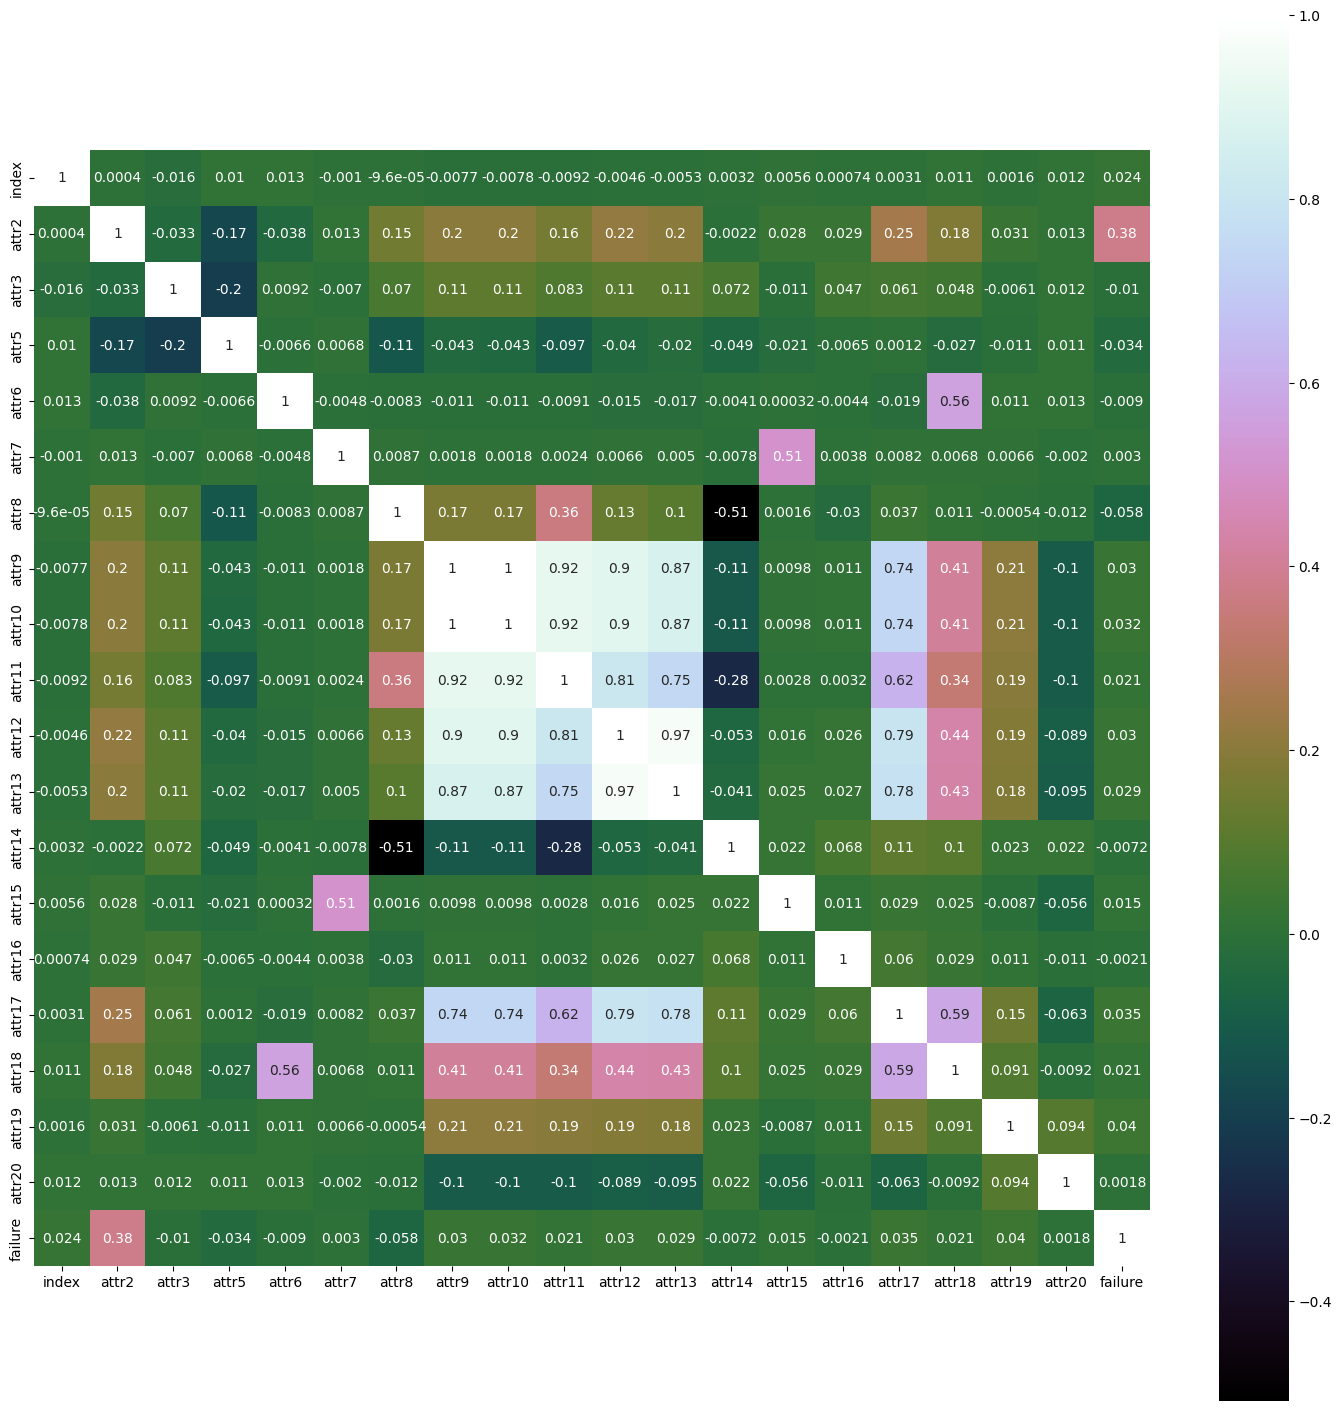

In [168]:
correlation = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [169]:
# # # take a 5% sample as this is computationally expensive
# df_sample = df.sample(frac=0.05)
# # # Pairwise plots
# pplot = sns.pairplot(df_sample, hue="index")

In [170]:
df.attr1.unique()
# df.attr4.unique()

# Prepend string prior to encoding
df['attr1'] = '1_' + df['attr1'].astype(str)
df['attr4'] = '4_' + df['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(df['attr1'])
df = df.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(df['attr4'])
df = df.join(one_hot_attr4)

In [171]:
pd.set_option('display.max_columns', None)
# 19, 20, 14, 9
df = df.drop(['attr1', 'attr4', 'attr10', 'attr13', 'attr15', 'attr19', 'attr20'], axis=1)

In [172]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.8*len(df)), int(1*len(df))])
print(train.shape, test.shape, validate.shape)

# Separate target and predictors
y_train = df['failure']
x_train = df.drop(['failure'], axis=1)
y_test = test['failure']
x_test = test.drop(['failure'], axis=1)
y_validate = validate['failure']
x_validate = validate.drop(['failure'], axis=1)

print(y_test.mean())
print(y_train.mean())

(4995, 34) (1249, 34) (0, 34)
0.20096076861489193
0.20964125560538116


In [173]:
# Variable importance
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))

Features sorted by their score:
[(0.1269, 'attr2'), (0.0839, 'index'), (0.0656, 'attr5'), (0.0581, 'attr12'), (0.0573, 'attr8'), (0.0551, 'attr18'), (0.0551, 'attr17'), (0.0547, 'attr9'), (0.0546, 'attr11'), (0.0545, 'attr6'), (0.0534, 'attr7'), (0.053, 'attr16'), (0.0516, 'attr3'), (0.0515, 'attr14'), (0.0245, '1_B'), (0.0196, '1_G'), (0.0152, '1_F'), (0.0076, '1_C'), (0.0075, '4_A'), (0.0061, '4_I'), (0.006, '4_H'), (0.0053, '4_B'), (0.0047, '4_J'), (0.0047, '4_E'), (0.0046, '4_F'), (0.0042, '4_D'), (0.0041, '4_L'), (0.004, '4_K'), (0.0026, '4_G'), (0.0023, '4_C'), (0.001, '1_A'), (0.0006, '1_E'), (0.0, '1_D')]


In [174]:
# Instantiate
rf = RandomForestClassifier()    
# Fit
rf_model = rf.fit(x_train, y_train)
# training accuracy 99.74%
rf_model.score(x_train, y_train)

1.0

In [175]:
# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))

In [176]:
# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=14)
rf_cv_mean = np.mean(rf_cv_scores)

print(rf_f1)

1.0


In [177]:
asm_test = pd.read_csv('assignment-test.csv')

# Prepend string prior to encoding
asm_test['attr1'] = '1_' + asm_test['attr1'].astype(str)
asm_test['attr4'] = '4_' + asm_test['attr4'].astype(str)

# Create 'attr1' dummies and join
one_hot_attr1 = pd.get_dummies(asm_test['attr1'])
asm_test = asm_test.join(one_hot_attr1)

# Create 'attr4' dummies and join
one_hot_attr4 = pd.get_dummies(asm_test['attr4'])
asm_test = asm_test.join(one_hot_attr4)

pd.set_option('display.max_columns', None)
asm_test.head()

asm_test = asm_test.drop(['attr1', 'attr4', 'attr10', 'attr13', 'attr15', 'attr19', 'attr20'], axis=1)

In [178]:
# prediction = pd.DataFrame(rf_model.predict(asm_test))
# print(prediction.describe())

# prediction.to_csv("submission_randomForest.csv")

prediction = pd.DataFrame(rf_model.predict(asm_test))
# print(prediction)
df_output = asm_test[["index"]]
df_output2 = df_output.assign(failure = prediction)
df_output2.to_csv("submission_randomForest.csv")
df_output2.to_csv("submission_2.csv")

df_output2.head()

,index,failure
0,6244,0
1,6245,0
2,6246,0
3,6247,1
4,6248,0


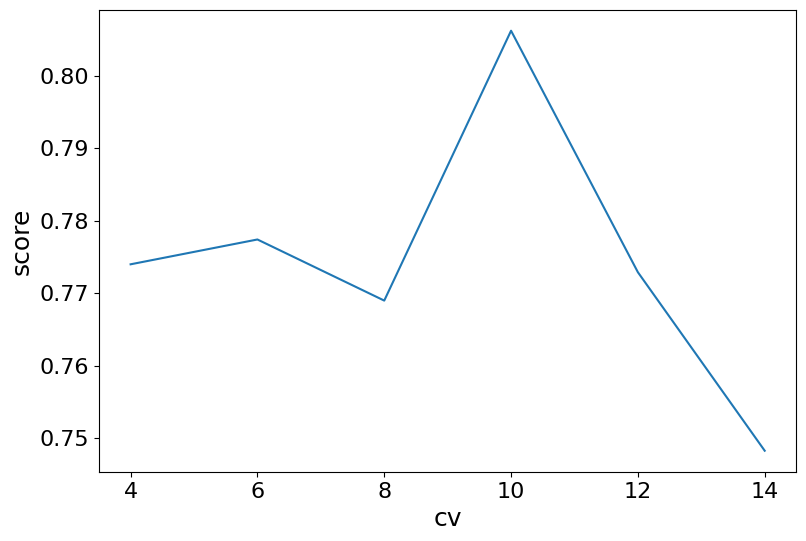

In [179]:
cross_folds = [4,6,8,10,12,14]
scores = [0.773972602739726,0.7773972602739727,0.7689655172413793,0.8062,0.7728813559322034,0.7482517482517482]

plt.figure(figsize=(9,6))
plt.plot(cross_folds, scores)

plt.xlabel("cv", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()